In [1]:
#Jupyter notebook fo the analysis of data from the spectophotometer to quantify laccase activity
#Author: Maria del Carmen Sanchez OLmos
#Date: November 2024

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import wellmap
import statistics
import matplotlib.pyplot as plt


In [66]:
#Make sure to have the dataframe (files from the spectrophotometer) in the same directory where is the jupyter notebook
#Definition of dataframe t0:
df_t0=pd.read_csv('t1_re-screening_RT_Maria418nm-laccases.CSV')
df_t0=df_t0.drop(columns=["0"])

In [67]:
df_t0

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.118,0.233,0.138,0.139,0.285,0.123,1.161,0.289,0.183,0.124,0.122,0.115
1,0.116,0.163,0.152,0.147,0.317,0.113,0.741,0.521,0.198,0.110,0.129,0.120
2,0.118,0.162,0.141,0.146,0.540,0.097,0.714,0.358,0.228,0.112,0.125,0.109
3,0.127,0.119,0.155,0.132,0.664,0.092,0.697,0.838,0.261,0.150,0.117,0.110
4,0.128,0.180,0.135,0.162,0.633,0.110,0.926,0.519,0.218,0.103,0.111,0.121
5,0.127,0.150,0.162,0.179,0.623,0.092,0.759,0.231,0.176,0.121,0.115,0.103
6,0.115,0.191,0.121,0.134,0.691,1.183,0.692,0.163,0.169,0.169,0.119,0.098
7,0.118,0.121,0.661,0.117,0.585,0.095,0.091,0.090,0.091,0.087,0.088,0.089


In [68]:
#Definition of dataframe for T2:
df_t2=pd.read_csv('t2-re-screening-RT_Maria418nm-laccases.CSV')
df_t2=df_t2.drop(columns=["0"])

In [69]:
df_t2

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.283,0.673,0.448,0.649,0.538,0.221,1.323,0.436,0.342,0.277,0.132,0.214
1,0.340,0.591,0.373,0.570,0.479,0.133,0.810,0.655,0.363,0.150,0.236,0.146
2,0.267,0.505,0.452,0.558,0.681,0.091,0.731,0.471,0.376,0.197,0.292,0.149
3,0.538,0.364,0.427,0.434,0.770,0.088,0.736,0.942,0.399,0.224,0.145,0.149
4,0.429,0.476,0.276,0.279,0.737,0.156,0.983,0.560,0.355,0.115,0.121,0.143
5,0.324,0.364,0.361,0.388,0.714,0.090,0.801,0.307,0.273,0.168,0.155,0.112
6,0.159,0.255,0.153,0.165,0.703,1.229,0.697,0.182,0.227,0.250,0.124,0.098
7,0.124,0.141,0.879,0.133,0.745,0.088,0.084,0.083,0.086,0.082,0.082,0.084


In [70]:
#Numerical transformation of the values to be able to handle them easily:
df_transformed=pd.DataFrame(df_t2.values-df_t0.values)*1000/23

In [71]:
df_transformed=df_transformed.set_axis(["1","2","3","4","5","6","7","8","9","10","11","12"],axis='columns')

In [72]:
df_transformed=df_transformed.set_axis(["A","B","C","D","E","F","G","H"],axis='index')

In [73]:
df_transformed

,1,2,3,4,5,6,7,8,9,10,11,12
A,7.173913,19.130435,13.478261,22.173913,11.000000,4.260870,7.043478,6.391304,6.913043,6.652174,0.434783,4.304348
B,9.739130,18.608696,9.608696,18.391304,7.043478,0.869565,3.000000,5.826087,7.173913,1.739130,4.652174,1.130435
C,6.478261,14.913043,13.521739,17.913043,6.130435,-0.260870,0.739130,4.913043,6.434783,3.695652,7.260870,1.739130
D,17.869565,10.652174,11.826087,13.130435,4.608696,-0.173913,1.695652,4.521739,6.000000,3.217391,1.217391,1.695652
E,13.086957,12.869565,6.130435,5.086957,4.521739,2.000000,2.478261,1.782609,5.956522,0.521739,0.434783,0.956522
F,8.565217,9.304348,8.652174,9.086957,3.956522,-0.086957,1.826087,3.304348,4.217391,2.043478,1.739130,0.391304
G,1.913043,2.782609,1.391304,1.347826,0.521739,2.000000,0.217391,0.826087,2.521739,3.521739,0.217391,0.000000
H,0.260870,0.869565,9.478261,0.695652,6.956522,-0.304348,-0.304348,-0.304348,-0.217391,-0.217391,-0.260870,-0.217391


In [78]:
#Definition of the blanck well:
#row
#column
blank=df_transformed.iloc[2]['6']

In [79]:
blank

-0.2608695652173915

In [80]:
#Substracting the blank to all values:
df_transformed_sub_blank=df_transformed.sub(blank)

In [81]:
df_transformed_sub_blank

,1,2,3,4,5,6,7,8,9,10,11,12
A,7.434783,19.391304,13.739130,22.434783,11.260870,4.521739,7.304348,6.652174,7.173913,6.913043,6.956522e-01,4.565217
B,10.000000,18.869565,9.869565,18.652174,7.304348,1.130435,3.260870,6.086957,7.434783,2.000000,4.913043e+00,1.391304
C,6.739130,15.173913,13.782609,18.173913,6.391304,0.000000,1.000000,5.173913,6.695652,3.956522,7.521739e+00,2.000000
D,18.130435,10.913043,12.086957,13.391304,4.869565,0.086957,1.956522,4.782609,6.260870,3.478261,1.478261e+00,1.956522
E,13.347826,13.130435,6.391304,5.347826,4.782609,2.260870,2.739130,2.043478,6.217391,0.782609,6.956522e-01,1.217391
F,8.826087,9.565217,8.913043,9.347826,4.217391,0.173913,2.086957,3.565217,4.478261,2.304348,2.000000e+00,0.652174
G,2.173913,3.043478,1.652174,1.608696,0.782609,2.260870,0.478261,1.086957,2.782609,3.782609,4.782609e-01,0.260870
H,0.521739,1.130435,9.739130,0.956522,7.217391,-0.043478,-0.043478,-0.043478,0.043478,0.043478,6.106227e-16,0.043478


In [82]:
#Definition of the parental values
###BE CAREFUL when defining this collection of values because it changes for the re-screening format in the 96 microtiter plate.
#For the re-screening format:
parental=df_transformed_sub_blank.iloc[5]["7"],df_transformed_sub_blank.iloc[5]["8"],df_transformed_sub_blank.iloc[5]["9"],df_transformed_sub_blank.iloc[5]["10"],df_transformed_sub_blank.iloc[5]["11"],df_transformed_sub_blank.iloc[5]["12"]
#For the screening format:
#parental=df_transformed_sub_blank.iloc[6]['7']

In [83]:
parental=list(parental)

In [84]:
#Calculating the mean, cv, stdev values:

In [85]:
meanparental=sum(parental)/6

In [86]:
meanparental

2.514492753623189

In [87]:
stdev_parental=statistics.stdev(parental)

In [88]:
cv_parental=stdev_parental/meanparental

In [89]:
cv_parental,meanparental,stdev_parental

(0.5311951397158485, 2.514492753623189, 1.3356863295753585)

In [90]:
#Relative values in comparison with the parental mean:
df_transformed_sub_blank_relative=df_transformed_sub_blank.divide(meanparental)

In [91]:
df_transformed_sub_blank_relative

,1,2,3,4,5,6,7,8,9,10,11,12
A,2.956772,7.711816,5.463977,8.922190,4.478386,1.798271,2.904899,2.645533,2.853026,2.749280,2.766571e-01,1.815562
B,3.976945,7.504323,3.925072,7.417867,2.904899,0.449568,1.296830,2.420749,2.956772,0.795389,1.953890e+00,0.553314
C,2.680115,6.034582,5.481268,7.227666,2.541787,0.000000,0.397695,2.057637,2.662824,1.573487,2.991354e+00,0.795389
D,7.210375,4.340058,4.806916,5.325648,1.936599,0.034582,0.778098,1.902017,2.489914,1.383285,5.878963e-01,0.778098
E,5.308357,5.221902,2.541787,2.126801,1.902017,0.899135,1.089337,0.812680,2.472622,0.311239,2.766571e-01,0.484150
F,3.510086,3.804035,3.544669,3.717579,1.677233,0.069164,0.829971,1.417867,1.780980,0.916427,7.953890e-01,0.259366
G,0.864553,1.210375,0.657061,0.639769,0.311239,0.899135,0.190202,0.432277,1.106628,1.504323,1.902017e-01,0.103746
H,0.207493,0.449568,3.873199,0.380403,2.870317,-0.017291,-0.017291,-0.017291,0.017291,0.017291,2.428413e-16,0.017291


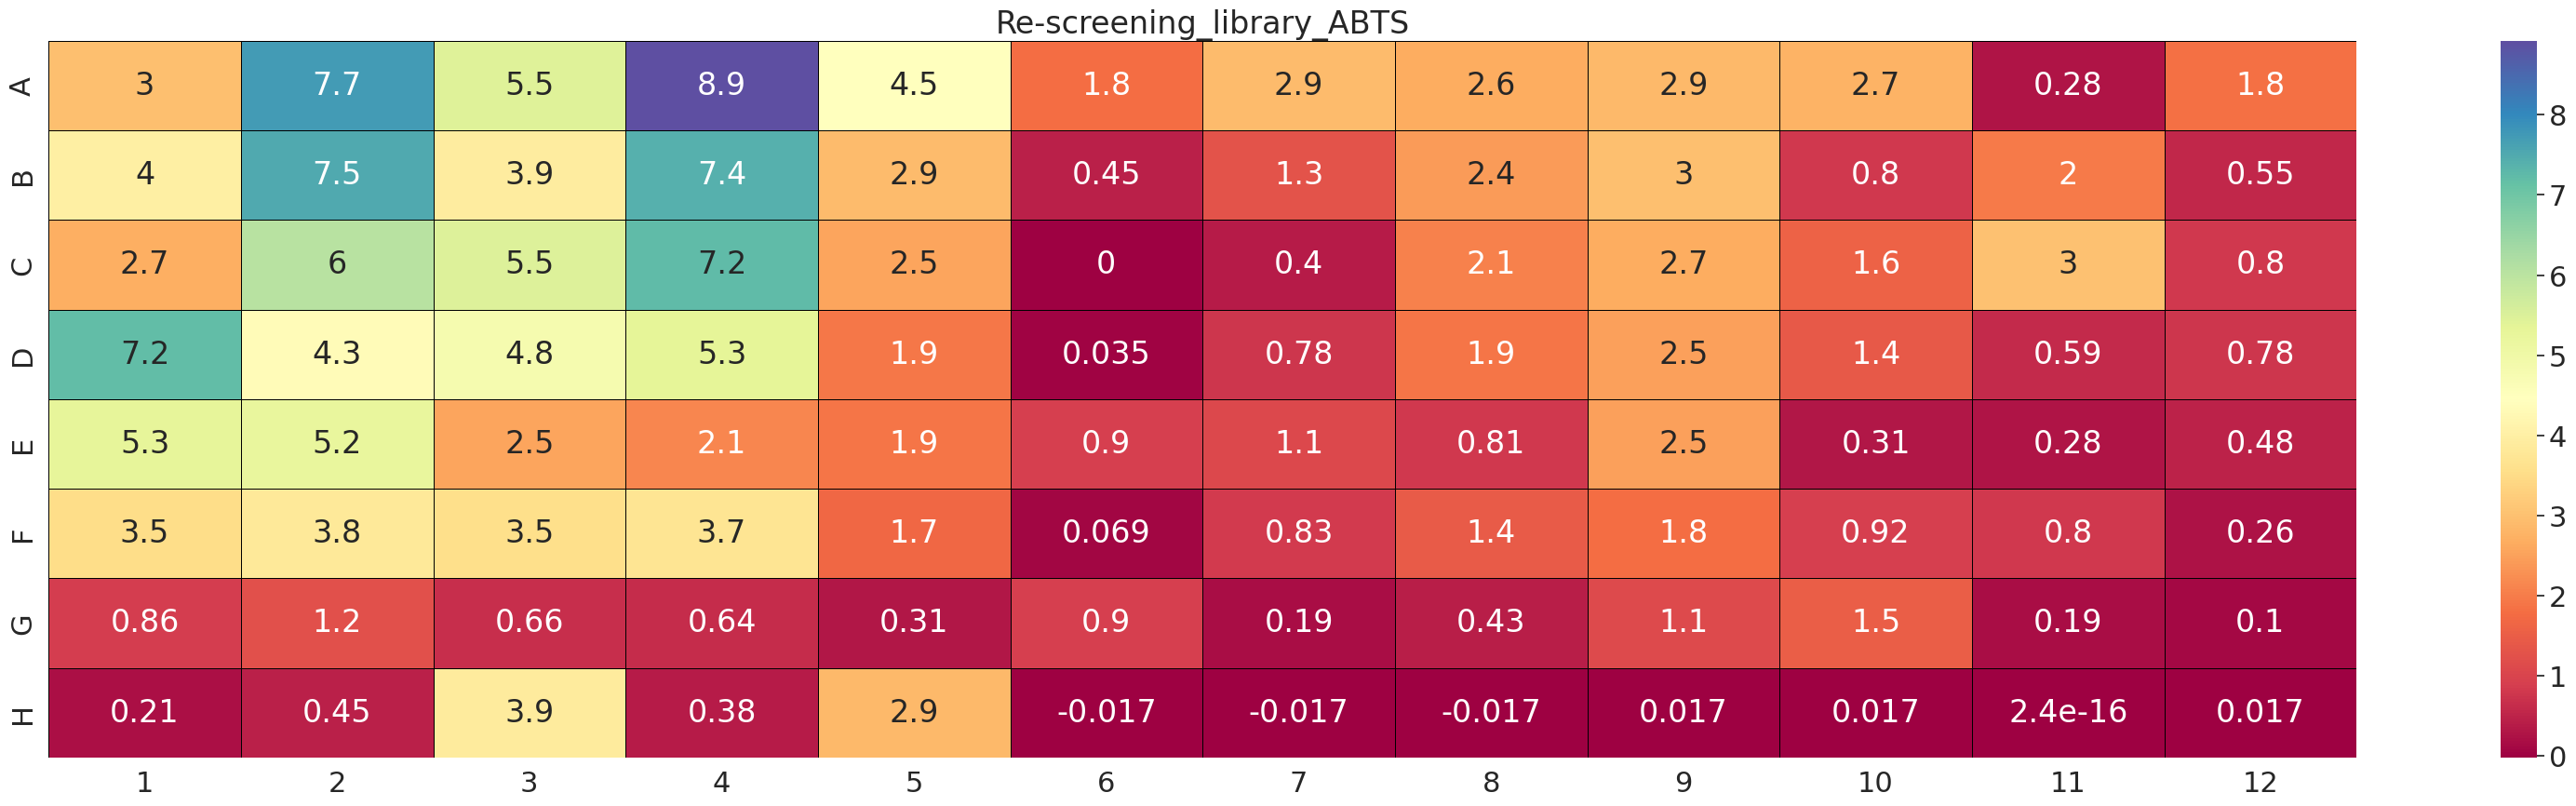

In [93]:
#Plotting the results:
plt.figure(figsize=(40,10))
sns.heatmap(df_transformed_sub_blank_relative,cmap="Spectral",linecolor="black", linewidths=0.6,annot=True)
sns.set(font_scale=2) # font size 2
plt.title('Re-screening_library_ABTS')
plt.savefig('Re-screening_library_ABTS_RT.png',format="png")